# Logistic Regression implementation without Scikit-learn


In [1]:
import numpy as np
import pandas as pd

from scipy.stats import norm
from sklearn.datasets import make_blobs

from matplotlib import pyplot
import matplotlib.pyplot as plt

import matplotlib.cm as cm
from random import sample

## Generating Some Example Data with 2 Features

In [2]:
n_feature = 2 # the number of features
n_components = 2 # the number of clusters

n=1000 # the number of total samples

In [3]:
# generate isotropic Gaussian blobs (data from mixture Gaussian distributions)
X, y = make_blobs(n_samples=n, # the number of total samples
                  centers=n_components, # the number of clusters
                  n_features=n_feature, # the number of features
                  cluster_std = [5] * n_components, # the std of each cluster
                  random_state=2) # 2

# X = np.hstack((np.ones((m, 1)), X))

X

array([[  2.21895948,  -9.0632939 ],
       [ -1.17379771,  -4.92688779],
       [  0.79041678, -14.59641646],
       ...,
       [ -0.78260563, -21.50260563],
       [ -3.21323086, -13.90436388],
       [ -1.40482172,  -9.1035902 ]])

In [4]:
for i in range(5):
    print('x =', X[i, ], ', y =', y[i])

x = [ 2.21895948 -9.0632939 ] , y = 1
x = [-1.17379771 -4.92688779] , y = 0
x = [  0.79041678 -14.59641646] , y = 0
x = [-0.98141459 -0.14837778] , y = 1
x = [ 6.64249161 -1.88234499] , y = 1


In [5]:
# Just to show you what is inside it. We print the first 10 elements of this numpy array. 
y[:10]

array([1, 0, 0, 1, 1, 0, 1, 0, 1, 1])

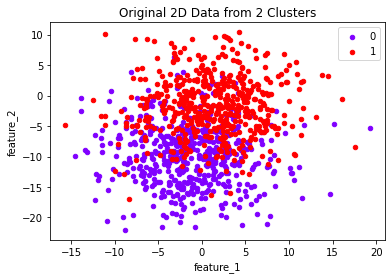

In [6]:
# scatter plot, data points annotated by different colors
df = pd.DataFrame(dict(feature_1=X[:,0], feature_2=X[:,1], label=y))


cluster_name = set(y)
colors = dict(zip(cluster_name, cm.rainbow(np.linspace(0, 1, len(cluster_name)))))
fig, ax = pyplot.subplots()

grouped = df.groupby('label')

for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='feature_1', y='feature_2', label=key, color=colors[key].reshape(1,-1))
    
pyplot.title('Original 2D Data from {} Clusters'.format(n_components))
pyplot.show()

In [7]:

# Create Test/Train
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [8]:
def sigmoid(z):
    """
    To convert continuous value into a range of 0 to 1

    I/P
    ----------
    z : Continuous value

    O/P
    -------
    Value in range between 0 to 1.
    """
    g = 1 / (1 + np.exp(-z))
    return g

In [9]:
def cost_function(X, y, weights):
    """
    Compute cost for logistic regression.

    I/P
    ----------
    X : 2D array where each row represent the training example and each column represent the feature ndarray. 
        Dimension(m x n)
        m= number of training examples
        n= number of features (including X_0 column of ones)
    y : 1D array of labels/target value for each traing example. dimension(1 x m)

    weights : 1D array of fitting parameters or weights. Dimension (1 x n)

    O/P
    -------
    cost : The cost of using theta as the parameter for linear regression to fit the data points in X and y.
    """
    m, n = X.shape
    x_dot_weights = X.dot(weights)

    cost = 1.0 / m * (-y.T.dot(np.log(sigmoid(x_dot_weights))) - (1 - y).T.dot(np.log(1 - sigmoid(x_dot_weights))))

    return cost

In [10]:
def gradient(X, y, weights):
    """
    Compute gradient for logistic regression.

    I/P
    ----------
    X : 2D array where each row represent the training example and each column represent the feature ndarray. 
    Dimension(m x n)
        m = number of training examples
        n = number of features (including X_0 column of ones)
    y : 1D array of labels/target value for each traing example. dimension(1 x m)

    weights : 1D array of fitting parameters or weights. Dimension (1 x n)

    O/P
    -------
    grad: (numpy array)The gradient of the cost with respect to the parameters theta
    """
    m, n = X.shape
    x_dot_weights = X.dot(weights)

    grad = (1.0 / m )* (sigmoid(x_dot_weights) - y).T.dot(X)

    return grad

In [11]:
weights = np.zeros(n_feature)


cost = cost_function(X_train, y_train, weights)
grad = gradient(X_train, y_train, weights)

print(cost)
print(grad)

0.6931471805599452
[-0.67306356 -2.04334234]


In [12]:
# Now we optimize it using Gradient Descent. 
num_iterations = 100
learnin_rate = 0.01

cost_list = []


# Implementation here is removed. 

# Your task to implement the GD here. 

for i in range(0, num_iterations):
    
    # 
    # Calculate the costs 
    ..... 
    
    print("Cost is: ", cost)
    # keep the costs for our visualization later 
    
    cost_list.append(cost)
    
    # Calculate the gradients [CODE REMOVED]
    ....
    
    # Use the gradient to update the weights [CODE REMOVED] 
    ....
    

Cost is:  0.6931471805599452
Cost is:  0.6511134846383863
Cost is:  0.6229190405104337
Cost is:  0.6036035082550789
Cost is:  0.5900191803151973
Cost is:  0.5802123005192352
Cost is:  0.5729596806860497
Cost is:  0.5674791245365727
Cost is:  0.5632577662507976
Cost is:  0.5599508128988057
Cost is:  0.5573209544439478
Cost is:  0.5552013119692716
Cost is:  0.5534722323572873
Cost is:  0.5520464066691345
Cost is:  0.5508591097625557
Cost is:  0.5498616639131213
Cost is:  0.5490169768875469
Cost is:  0.5482964423386212
Cost is:  0.5476777519263867
Cost is:  0.5471433283213929
Cost is:  0.5466791878435845
Cost is:  0.5462741047978773
Cost is:  0.5459189905440346
Cost is:  0.5456064273138438
Cost is:  0.5453303148290212
Cost is:  0.5450856000165374
Cost is:  0.5448680685411954
Cost is:  0.5446741827442848
Cost is:  0.5445009547150678
Cost is:  0.5443458461715964
Cost is:  0.5442066889517527
Cost is:  0.5440816214600913
Cost is:  0.5439690375493144
Cost is:  0.5438675451535706
Cost is:  0.54

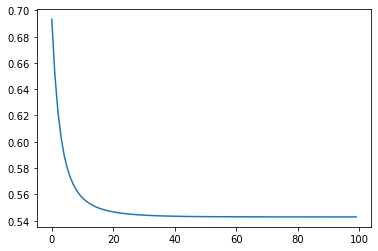

In [13]:
plt.plot(np.arange(num_iterations), cost_list)
plt.show()

In [14]:
def predict(weights, X):
    """
    Predict the class between 0 and 1 using learned logistic regression parameters weights.
    Using threshold value 0.5 to convert probability value to class value 

    I/P
    ----------
    X : 2D array where each row represent the training example and each column represent the feature ndarray. 
        Dimension(m x n)
        m= number of training examples
        n= number of features (including X_0 column of ones)

    theta : 1D array of fitting parameters or weights. Dimension (1 x n)

    O/P
    -------
    Class type based on threshold
    """
    p = sigmoid(X.dot(weights)) >= 0.5
    return p.astype(int)

In [15]:
predictions = predict(weights, X_test)
predictions

array([1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0])

In [16]:
y_test

array([1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1])

In [17]:
# Correct Predictions are the cases that are equal. 

correct = np.sum(predictions == y_test)


print("Accuracy is: ", correct/y_test.size)


Accuracy is:  0.7
